### Resultat för kurser (YH-utbildningar upp till 99 poäng)

In [149]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_excel(
    "data/resultat-2024-for-kurser-inom-yh.xlsx"
)

df.head()

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Avslag,Changemaker Educations AB,Futuregames Accessible Game Production,Juridik,0,0,0,0,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Avslag,Changemaker Educations AB,Futuregames Inclusive Game Development,"Ekonomi, administration och försäljning",0,0,0,0,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Avslag,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Avslag,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Avslag,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [150]:
df_inkomna_ansökningar = pd.read_excel(
    "data/inkomna-ansokningar-2024-for-kurser.xlsx",
)

df_inkomna_ansökningar.head()

,Diarienummer,Anordnare namn,Utbildningsnamn,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Changemaker Educations AB,Futuregames Accessible Game Production,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Changemaker Educations AB,Futuregames Inclusive Game Development,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",40,40,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [151]:
beviljade = (
    df.groupby("Utbildningsområde")[[
        "Totalt antal beviljade platser",
        "Antal beviljade platser start 2024",
        "Antal beviljade platser start och slut 2024",
        "Antal beviljade platser start 2025",
    ]]
    .sum()
    .reset_index()
    .sort_values(by= "Utbildningsområde", ascending= True)
)

beviljade.index.name = "id"
beviljade.reset_index(inplace=True)
beviljade

,id,Utbildningsområde,Totalt antal beviljade platser,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025
0,0,Data/IT,4159,1459,1276,1424
1,1,"Ekonomi, administration och försäljning",7148,2822,1714,2612
2,2,Friskvård och kroppsvård,0,0,0,0
3,3,"Hotell, restaurang och turism",586,132,322,132
4,4,Hälso- och sjukvård samt socialt arbete,3155,1140,940,1075
5,5,Journalistik och information,482,75,332,75
6,6,Juridik,518,130,258,130
7,7,"Kultur, media och design",300,20,260,20
8,8,"Lantbruk, djurvård, trädgård, skog och fiske",467,119,185,163
9,9,Pedagogik och undervisning,518,115,288,115


In [152]:
df_inkomna_ansökningar.shape

(881, 14)

In [153]:
ansökta_platser_utbildningsområde = (
    df_inkomna_ansökningar.groupby("Sökt utbildningsområde")[
        [
            "Sökt antal platser 2024",
            "Sökt antal platser 2024 (start och avslut 2024)",
            "Sökt antal platser 2025",
        ]
    ]
    .sum()
    .reset_index()
    .sort_values(by="Sökt utbildningsområde", ascending=True)
)

ansökta_platser_utbildningsområde["Total ansökta platser"] = (
    ansökta_platser_utbildningsområde[
        [
            "Sökt antal platser 2024",
            "Sökt antal platser 2024 (start och avslut 2024)",
            "Sökt antal platser 2025",
        ]
    ].sum(axis=1)
)

ansökta_platser_utbildningsområde.index.name = "id"

ansökta_platser_utbildningsområde = ansökta_platser_utbildningsområde.reset_index()
ansökta_platser_utbildningsområde

,id,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,Total ansökta platser
0,0,Data/IT,6631,4189,7638,18458
1,1,"Ekonomi, administration och försäljning",5861,3891,6564,16316
2,2,Friskvård och kroppsvård,146,0,196,342
3,3,"Hotell, restaurang och turism",937,707,1012,2656
4,4,Hälso- och sjukvård samt socialt arbete,4261,2525,5206,11992
5,5,Journalistik och information,350,295,375,1020
6,6,Juridik,273,278,293,844
7,7,"Kultur, media och design",1055,915,1190,3160
8,8,"Lantbruk, djurvård, trädgård, skog och fiske",693,465,717,1875
9,9,Pedagogik och undervisning,523,408,728,1659


In [154]:
df.describe

<bound method NDFrame.describe of       Diarienummer    Beslut                       Anordnare namn  \
0    MYH 2024/1000    Avslag            Changemaker Educations AB   
1    MYH 2024/1001    Avslag            Changemaker Educations AB   
2    MYH 2024/1002    Avslag        Båstads kommun Akademi Båstad   
3    MYH 2024/1003    Avslag        Båstads kommun Akademi Båstad   
4    MYH 2024/1004    Avslag        Båstads kommun Akademi Båstad   
..             ...       ...                                  ...   
875   MYH 2024/995  Beviljad  Hyper Island Program AB - Stockholm   
876   MYH 2024/996    Avslag                              INSU AB   
877   MYH 2024/997    Avslag                              INSU AB   
878   MYH 2024/998  Beviljad                      Campus Nyköping   
879   MYH 2024/999    Avslag            Changemaker Educations AB   

                                       Utbildningsnamn  \
0              Futuregames Accessible Game Production    
1               Futur

In [155]:
df["Kommun"].value_counts()

Kommun
Stockholm                    172
Se "Lista flera kommuner"    164
Göteborg                     103
Malmö                         65
Solna                         30
                            ... 
Jokkmokk                       1
Värnamo                        1
Färjestaden                    1
Järfälla                       1
Järna                          1
Name: count, Length: 91, dtype: int64

In [156]:
df["Utbildningsområde"].unique()

array(['Juridik', 'Ekonomi, administration och försäljning',
       'Lantbruk, djurvård, trädgård, skog och fiske',
       'Samhällsbyggnad och byggteknik', 'Data/IT',
       'Hälso- och sjukvård samt socialt arbete', 'Säkerhetstjänster',
       'Teknik och tillverkning', 'Journalistik och information',
       'Pedagogik och undervisning', 'Kultur, media och design',
       'Transporttjänster', 'Hotell, restaurang och turism',
       'Friskvård och kroppsvård'], dtype=object)

In [157]:
import duckdb
bevilade_avslag = duckdb.query(
    """--sql
    SELECT
        apu."Sökt utbildningsområde",
        apu."Total ansökta platser",
        b."Totalt antal beviljade platser"
    FROM 
        beviljade b 
    LEFT JOIN 
        ansökta_platser_utbildningsområde apu ON b.id = apu.id;
    """
).df()

In [158]:
bevilade_avslag

,Sökt utbildningsområde,Total ansökta platser,Totalt antal beviljade platser
0,Data/IT,18458,4159
1,"Ekonomi, administration och försäljning",16316,7148
2,Friskvård och kroppsvård,342,0
3,"Hotell, restaurang och turism",2656,586
4,Hälso- och sjukvård samt socialt arbete,11992,3155
5,Journalistik och information,1020,482
6,Juridik,844,518
7,"Kultur, media och design",3160,300
8,"Lantbruk, djurvård, trädgård, skog och fiske",1875,467
9,Pedagogik och undervisning,1659,518


### Graph

In [159]:
ansökta_platser_utbildningsområde = ansökta_platser_utbildningsområde.drop("id", axis= 1).set_index("Sökt utbildningsområde")

/var/folders/vq/_15cqrtj511_npmbzb5r8pzw0000gn/T/ipykernel_57459/244105776.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ansökta_platser_utbildningsområde.index, rotation=45, ha="right")
/var/folders/vq/_15cqrtj511_npmbzb5r8pzw0000gn/T/ipykernel_57459/244105776.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


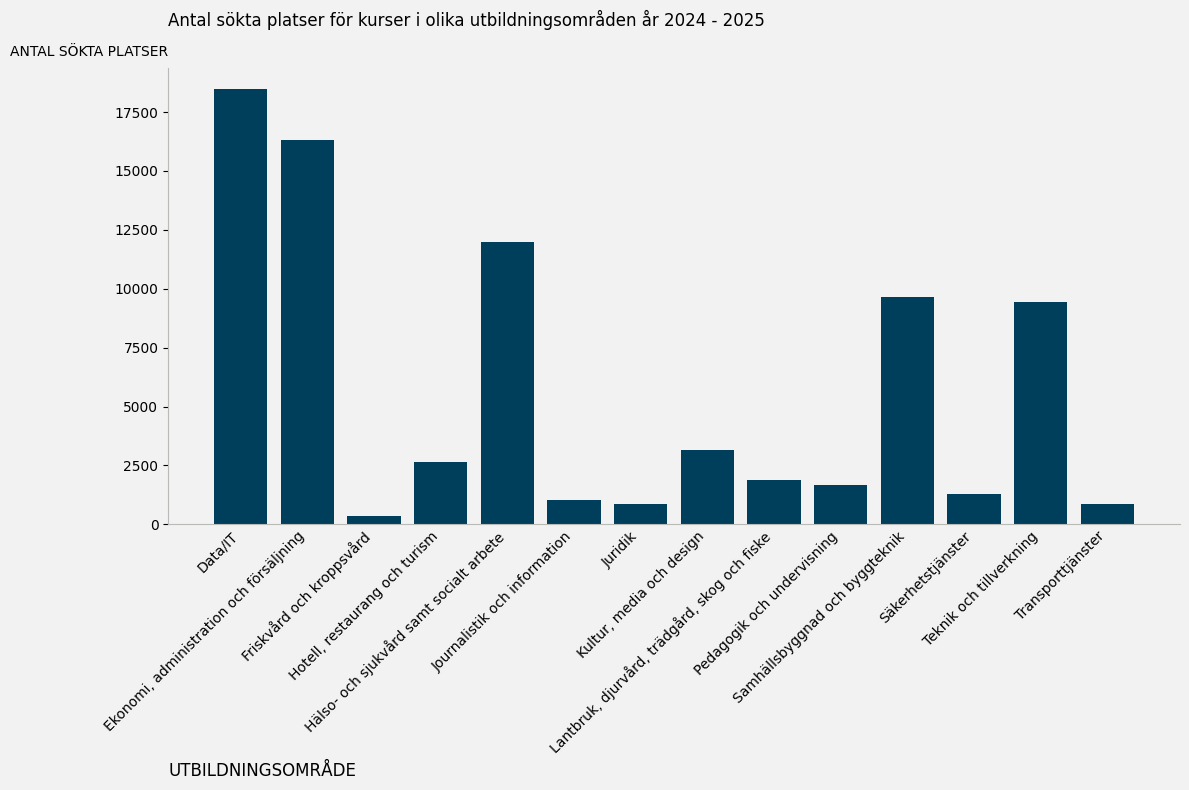

In [160]:
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(
    x=ansökta_platser_utbildningsområde.index,
    height=ansökta_platser_utbildningsområde["Total ansökta platser"],
    color="#003f5c" 
)

# Ljusgrå bakgrund
fig.patch.set_facecolor("#f2f2f2")  
ax.set_facecolor("#f2f2f2")         

# Remove clutter
ax.spines[["top", "right"]].set_visible(False)
ax.tick_params(axis="x", which="both", length=0)

# Contrast
ax.spines[["left", "bottom"]].set_color("#b9bbb6")
ax.tick_params(axis="both")

# Description and label
ax.set_xticklabels(labels=ansökta_platser_utbildningsområde.index, rotation=45, ha="right")
ax.set_title("Antal sökta platser för kurser i olika utbildningsområden år 2024 - 2025", fontsize=12, loc="left", pad=30)
ax.set_ylabel("ANTAL SÖKTA PLATSER", loc="top", rotation=0)
ax.yaxis.set_label_coords(0, 1.02)
ax.set_xlabel("UTBILDNINGSOMRÅDE", loc="left", fontsize=12)

fig.tight_layout()
fig.show()


Text(0, 0, 'UTBILDNINGSOMRÅDE')

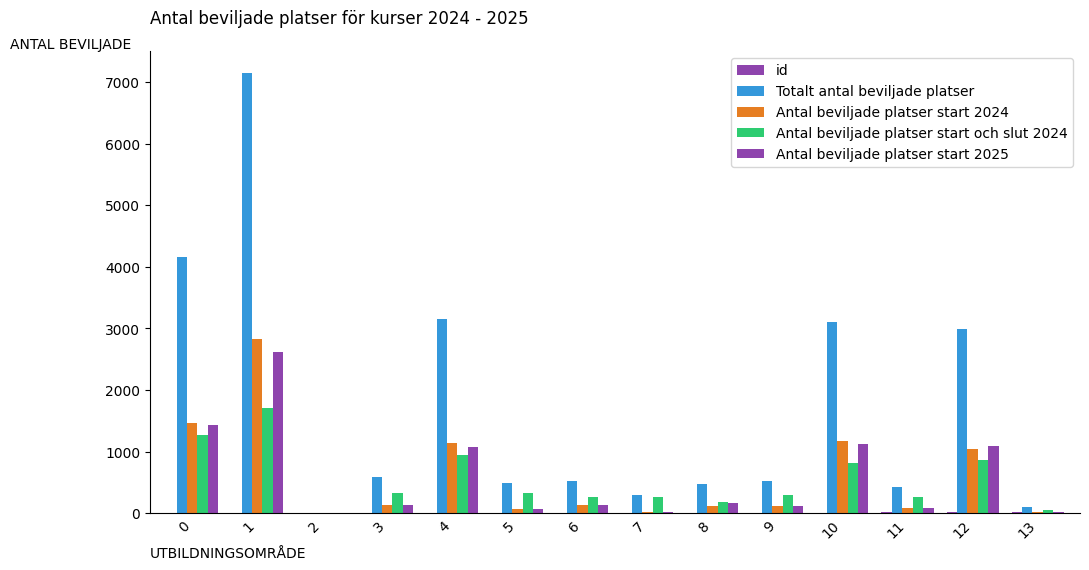

In [161]:
def beviljad_plot():
    colors = ['#8e44ad', '#3498db', '#e67e22', '#2ecc71']  
    ax = beviljade.plot(kind='bar', figsize=(12,6), width=0.8, color=colors)
    ax.set_xticklabels(beviljade.index, rotation=45, ha="right")

    fig = ax.get_figure()
    return fig, ax

fig, ax = beviljad_plot()

# Clutter
ax.spines[["top", "right"]].set_visible(False)
ax.tick_params("x", length=0)

# Contrast
ax.set_title("Antal beviljade platser för kurser 2024 - 2025", loc="left", pad=20)
ax.set_ylabel("ANTAL BEVILJADE", loc="top", rotation=0)
ax.yaxis.set_label_coords(-0.02, 1)
ax.set_xlabel("UTBILDNINGSOMRÅDE", loc="left")

In [162]:
bevilade_avslag["antal_avslag"] = bevilade_avslag["Total ansökta platser"] - bevilade_avslag["Totalt antal beviljade platser"]

In [163]:
bevilade_avslag.drop("Total ansökta platser", axis=1, inplace=True)
bevilade_avslag

,Sökt utbildningsområde,Totalt antal beviljade platser,antal_avslag
0,Data/IT,4159,14299
1,"Ekonomi, administration och försäljning",7148,9168
2,Friskvård och kroppsvård,0,342
3,"Hotell, restaurang och turism",586,2070
4,Hälso- och sjukvård samt socialt arbete,3155,8837
5,Journalistik och information,482,538
6,Juridik,518,326
7,"Kultur, media och design",300,2860
8,"Lantbruk, djurvård, trädgård, skog och fiske",467,1408
9,Pedagogik och undervisning,518,1141


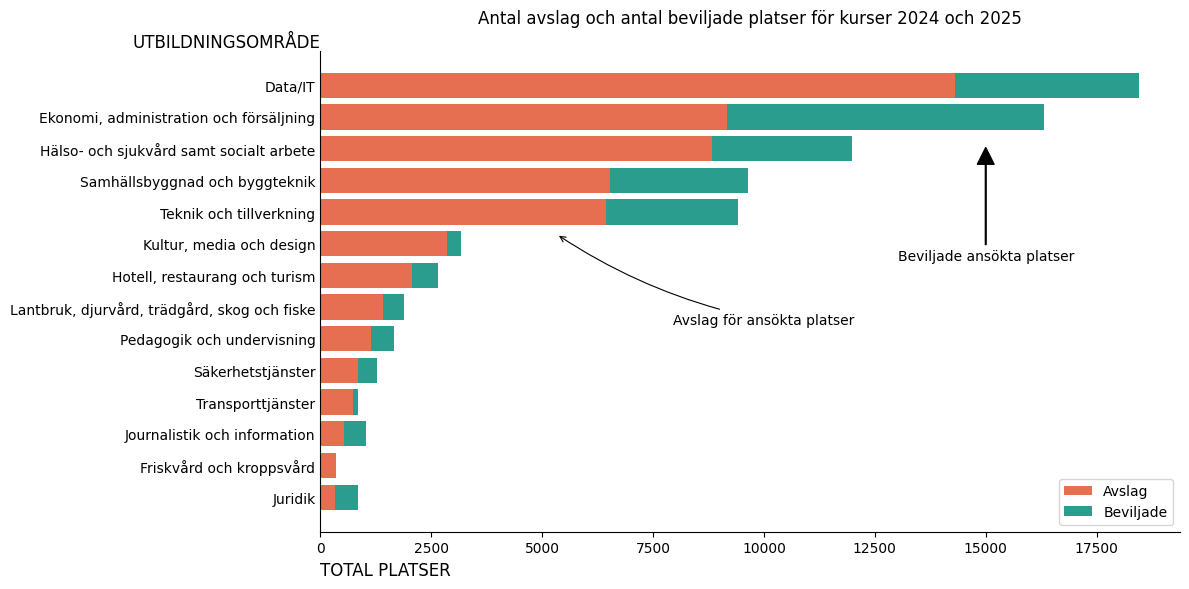

In [164]:
import numpy as np
import matplotlib.pyplot as plt


bevilade_avslag.sort_values(by="antal_avslag", inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))


length = np.arange(len(bevilade_avslag["Sökt utbildningsområde"]))


färg_avslag = "#e76f51"        
färg_beviljad = "#2a9d8f"       


ax.barh(length, bevilade_avslag["antal_avslag"], label="Avslag", color=färg_avslag)
ax.barh(
    length,
    bevilade_avslag["Totalt antal beviljade platser"],
    left=bevilade_avslag["antal_avslag"],
    label="Beviljade",
    color=färg_beviljad
)


ax.legend()
ax.tick_params("y", length=0)
ax.spines[["top", "right"]].set_visible(False)
ax.set_yticks(length)
ax.set_yticklabels(bevilade_avslag["Sökt utbildningsområde"])
ax.set_title("Antal avslag och antal beviljade platser för kurser 2024 och 2025", pad=20)
ax.set_ylabel("UTBILDNINGSOMRÅDE", loc="top", rotation=0, fontsize=12)
ax.yaxis.set_label_coords(0, 1)
ax.set_xlabel("TOTAL PLATSER", loc="left", fontsize=12)


if len(ax.patches) > 3:
    rect1 = ax.patches[0] 
    rect2 = ax.patches[2] 

    ax.annotate(
        "Avslag för ansökta platser",
        xy=(rect1.get_width() + 5000, rect1.get_y() + 8.7),
        ha="center",
        va="center",
        arrowprops=dict(arrowstyle="->", linewidth=0.8, connectionstyle="arc3, rad=-.1"),
        xytext=(rect1.get_height() + 10000, rect1.get_y() + 6)
    )

    ax.annotate(
        "Beviljade ansökta platser",
        xy=(rect2.get_height() + 15000, rect2.get_y() + 9.5),
        ha="center",
        va="center",
        arrowprops=dict(facecolor="black", shrink=0.02, width=0.5),
        xytext=(rect2.get_height() + 15000, rect2.get_y() + 6)
    )

fig.tight_layout()
plt.show()
